In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
forest_data = pd.read_excel('Bird_Monitoring_Data_FOREST.XLSX')
grassland_data = pd.read_excel('Bird_Monitoring_Data_GRASSLAND.XLSX')

# Handle Missing Data for Forest Data
forest_data['Sub_Unit_Code'] = forest_data['Sub_Unit_Code'].fillna('Not Available').astype(str)
forest_data['Sex'] = forest_data['Sex'].fillna('Not Available')
forest_data['Distance'] = forest_data['Distance'].fillna('Not Available')
forest_data['AcceptedTSN'] = forest_data['AcceptedTSN'].fillna('Not Available')

# Convert date format in forest data
if 'date' in forest_data.columns:
    forest_data['date'] = pd.to_datetime(forest_data['date'], format='%d/%m/%Y', errors='coerce').dt.strftime('%Y-%m-%d')

# Handle Missing Data for Grassland Data
grassland_data['Sub_Unit_Code'] = grassland_data['Sub_Unit_Code'].fillna('Not Available').astype(str)
grassland_data['Distance'] = grassland_data['Distance'].fillna('Not Available')

# Fill missing data only if the column exists
for col in ['ID_Method', 'Accepted TSN', 'Taxoncode']:
    if col in grassland_data.columns:
        grassland_data[col] = grassland_data[col].fillna('Not Available')

# Convert date format in grassland data
if 'date' in grassland_data.columns:
    grassland_data['date'] = pd.to_datetime(grassland_data['date'], format='%d/%m/%Y', errors='coerce').dt.strftime('%Y-%m-%d')

# Combine Cleaned Data
combined_data = pd.concat([forest_data, grassland_data], ignore_index=True)

# Save Combined Data to File
combined_data.to_excel('Combined_Bird_Monitoring_Data.xlsx', index=False)


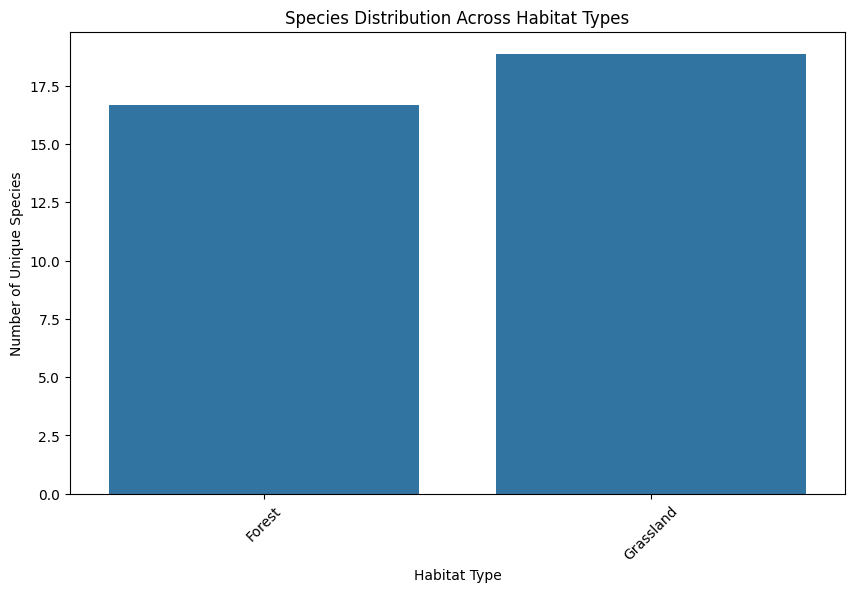

In [2]:
    # Distribution of Species Across Administrative Units and Habitat Types
    # Count species per administrative unit and habitat type
    species_admin_units = combined_data.groupby(['Location_Type', 'Plot_Name'])['Scientific_Name'].nunique().reset_index()
    species_admin_units = species_admin_units.rename(columns={'Scientific_Name': 'Species_Count'})

    # Plot biodiversity across habitat types
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Location_Type', y='Species_Count', data=species_admin_units, errorbar=None)
    plt.title('Species Distribution Across Habitat Types')
    plt.xlabel('Habitat Type')
    plt.ylabel('Number of Unique Species')
    plt.xticks(rotation=45)
    plt.show()

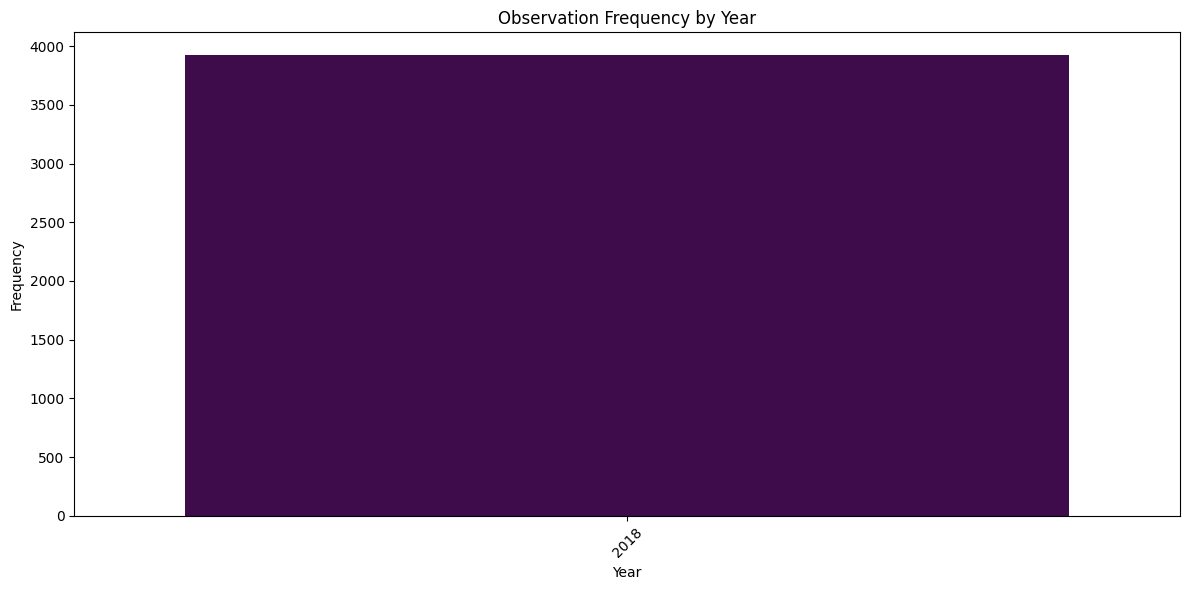

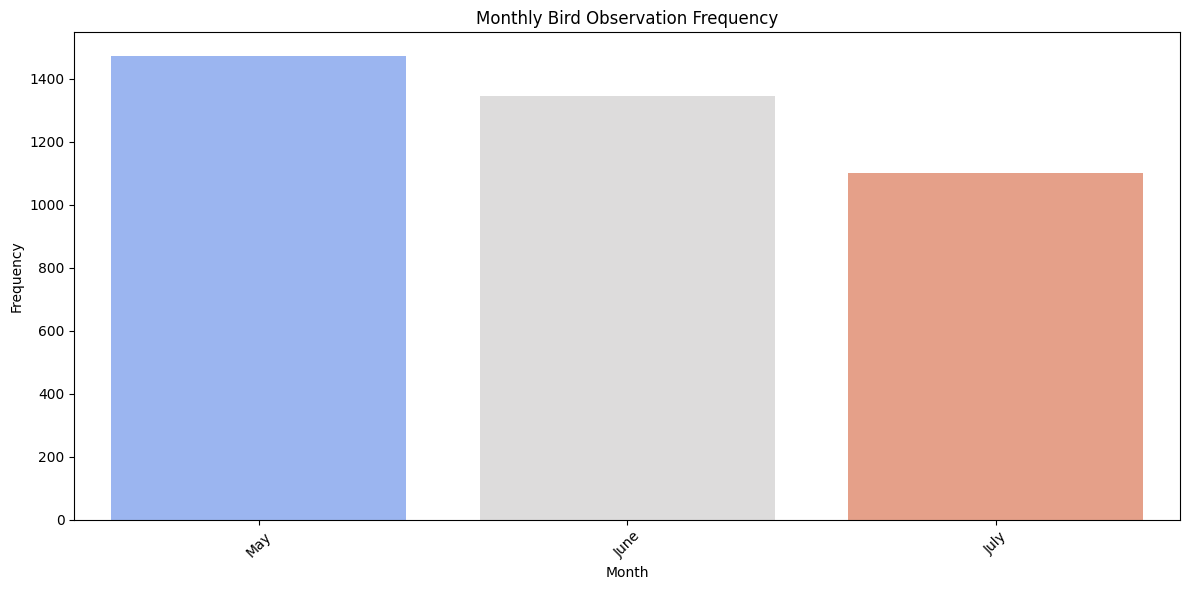

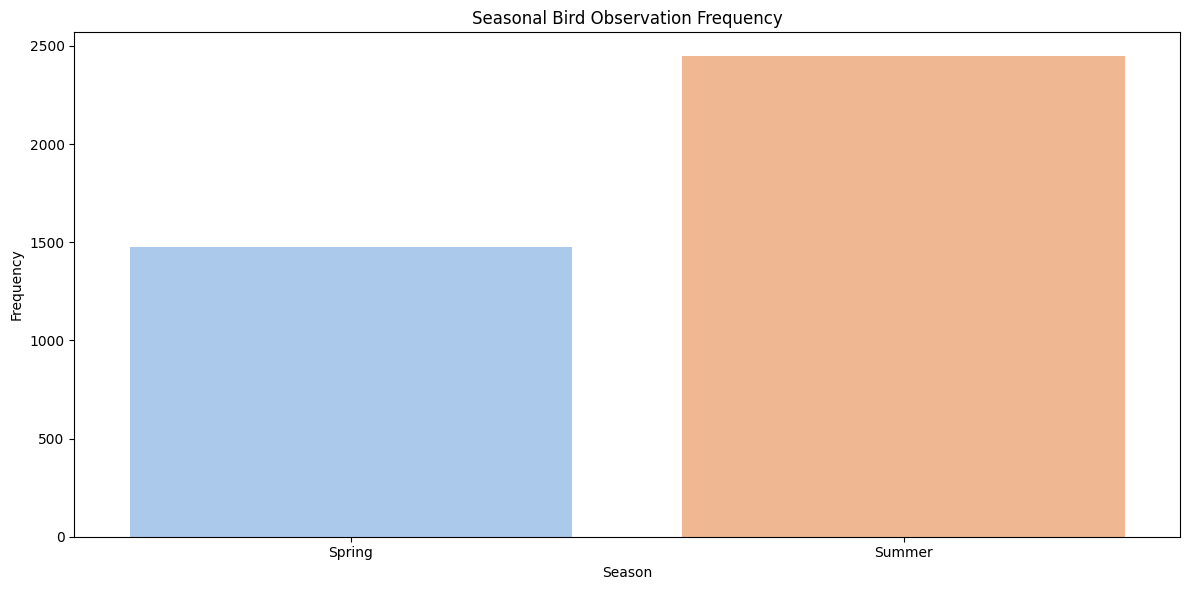

In [4]:
# Observation Frequency by Year, Month, and Season

# Extract Year, Month, and Season
combined_data['Year'] = pd.to_datetime(combined_data['Date'], errors='coerce').dt.year
combined_data['Month'] = pd.to_datetime(combined_data['Date'], errors='coerce').dt.month
combined_data['Season'] = combined_data['Month'] % 12 // 3 + 1  # 1: Winter, 2: Spring, 3: Summer, 4: Fall

# Map numeric months to month names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
    6: 'June', 7: 'July', 8: 'August', 9: 'September', 
    10: 'October', 11: 'November', 12: 'December'
}
combined_data['Month_Name'] = combined_data['Month'].map(month_names)

# Map numeric seasons to season names
season_names = {
    1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'
}
combined_data['Season_Name'] = combined_data['Season'].map(season_names)

# Observation Frequency by Year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Year', data=combined_data, palette='viridis', dodge=False, legend=False)
plt.title('Observation Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Observation Frequency by Month (with month names)
plt.figure(figsize=(12, 6))
sns.countplot(x='Month_Name', hue='Month_Name', data=combined_data, palette='coolwarm', dodge=False, legend=False)
plt.title('Monthly Bird Observation Frequency')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Observation Frequency by Season (with season names)
plt.figure(figsize=(12, 6))
sns.countplot(x='Season_Name', hue='Season_Name', data=combined_data, palette='pastel', dodge=False, legend=False)
plt.title('Seasonal Bird Observation Frequency')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()




Summary Statistics:
        Temperature     Humidity
count  3921.000000  3921.000000
mean     23.981051    68.737822
std       4.936211    13.854467
min      12.900000    32.900002
25%      21.000000    59.000000
50%      23.799999    69.000000
75%      26.799999    79.900002
max      37.299999    93.300003

Correlation Matrix:
                        Temperature  Humidity  Initial_Three_Min_Cnt
Temperature               1.000000 -0.719612              -0.059467
Humidity                 -0.719612  1.000000               0.067992
Initial_Three_Min_Cnt    -0.059467  0.067992               1.000000


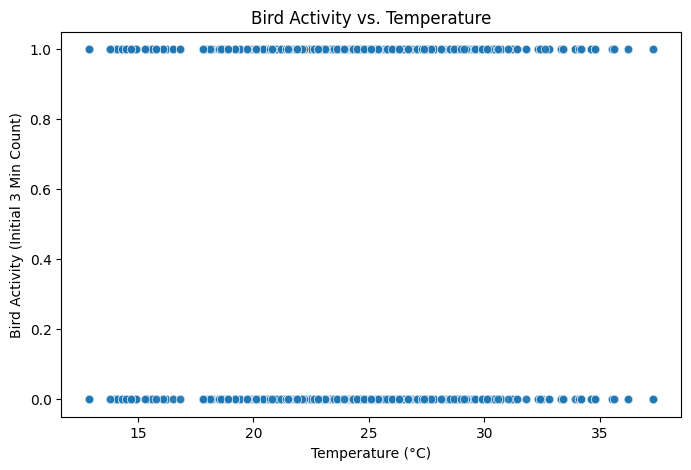

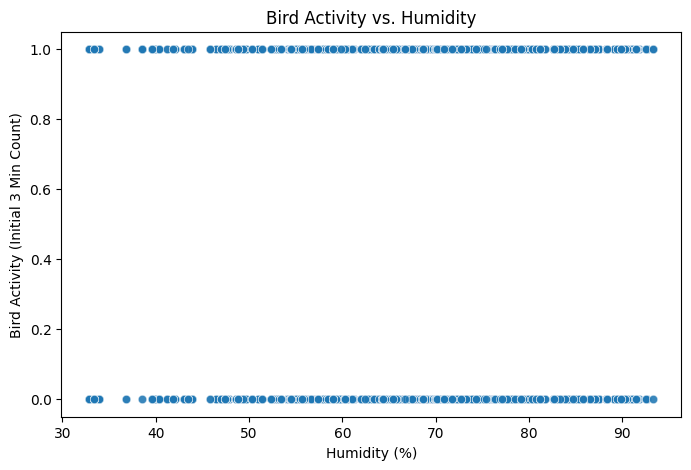

In [5]:
# Environmental Conditions vs Bird Activity
# Summary statistics for environmental conditions
summary_stats = combined_data[["Temperature", "Humidity"]].describe()
print("\nSummary Statistics:\n", summary_stats)

# Compute correlation matrix
correlation_matrix = combined_data[["Temperature", "Humidity", "Initial_Three_Min_Cnt"]].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Scatter plot of Temperature vs. Bird Activity
plt.figure(figsize=(8, 5))
sns.scatterplot(x=combined_data["Temperature"], y=combined_data["Initial_Three_Min_Cnt"], alpha=0.5)
plt.title("Bird Activity vs. Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Bird Activity (Initial 3 Min Count)")
plt.show()

# Scatter plot of Humidity vs. Bird Activity
plt.figure(figsize=(8, 5))
sns.scatterplot(x=combined_data["Humidity"], y=combined_data["Initial_Three_Min_Cnt"], alpha=0.5)
plt.title("Bird Activity vs. Humidity")
plt.xlabel("Humidity (%)")
plt.ylabel("Bird Activity (Initial 3 Min Count)")
plt.show()

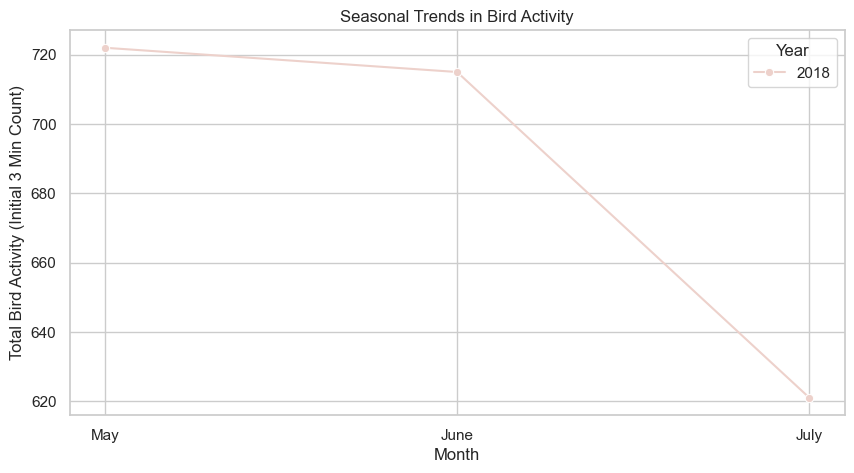

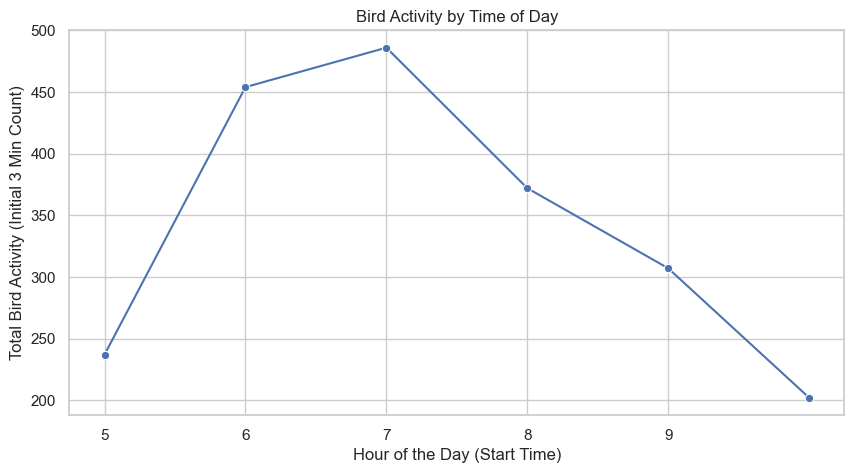

In [16]:

#Temporal Analysis

# Convert 'Date' column to datetime format
combined_data["Date"] = pd.to_datetime(combined_data["Date"])

# Extract year and month for seasonal analysis
combined_data["Year"] = combined_data["Date"].dt.year
combined_data["Month"] = combined_data["Date"].dt.month

# Group by year and month to analyze seasonal trends
seasonal_trends = combined_data.groupby(["Year", "Month"])["Initial_Three_Min_Cnt"].sum().reset_index()

# Convert 'Start_Time' and 'End_Time' to datetime format
combined_data["Start_Time"] = pd.to_datetime(combined_data["Start_Time"], format="%H:%M:%S").dt.hour
combined_data["End_Time"] = pd.to_datetime(combined_data["End_Time"], format="%H:%M:%S").dt.hour

# Group by hour to analyze bird activity by time of day
time_trends = combined_data.groupby("Start_Time")["Initial_Three_Min_Cnt"].sum().reset_index()

# Set plot style
sns.set_theme(style="whitegrid")

# Seasonal trends visualization
plt.figure(figsize=(10, 5))
sns.lineplot(x=seasonal_trends["Month"], y=seasonal_trends["Initial_Three_Min_Cnt"], hue=seasonal_trends["Year"], marker="o")
plt.title("Seasonal Trends in Bird Activity")
plt.xlabel("Month")
plt.ylabel("Total Bird Activity (Initial 3 Min Count)")
plt.xticks(ticks=[5, 6, 7], labels=["May", "June", "July"])
plt.legend(title="Year")
plt.show()

# Observation time trends visualization
plt.figure(figsize=(10, 5))
sns.lineplot(x=time_trends["Start_Time"], y=time_trends["Initial_Three_Min_Cnt"], marker="o")
plt.title("Bird Activity by Time of Day")
plt.xlabel("Hour of the Day (Start Time)")
plt.ylabel("Total Bird Activity (Initial 3 Min Count)")
plt.xticks(range(5, 10))
plt.show()


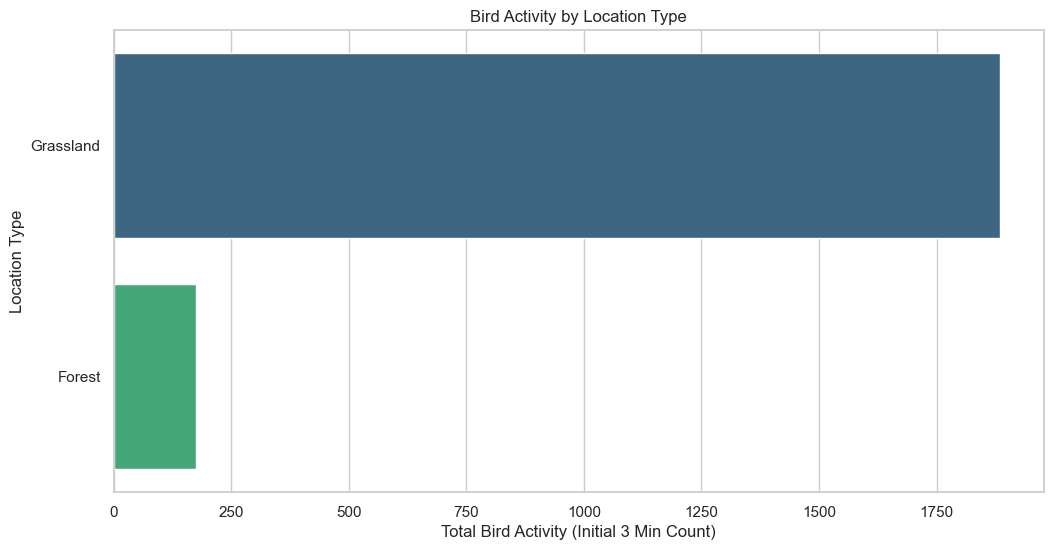

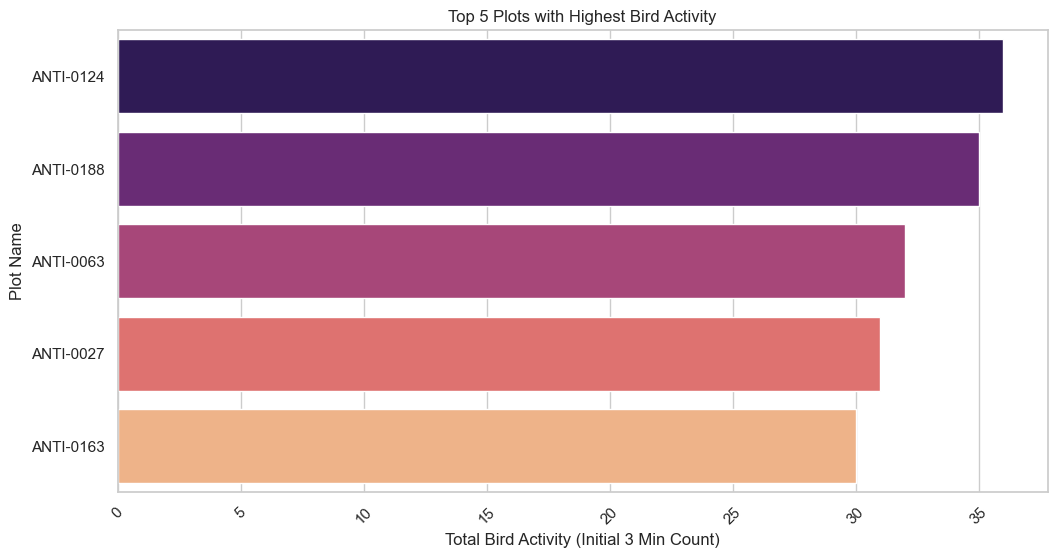

In [8]:
#Spatial Analysis

# Convert 'Initial_Three_Min_Cnt' to numeric
combined_data["Initial_Three_Min_Cnt"] = pd.to_numeric(combined_data["Initial_Three_Min_Cnt"], errors="coerce")

# Group data by Location_Type to analyze biodiversity hotspots
location_analysis = combined_data.groupby("Location_Type")["Initial_Three_Min_Cnt"].sum().reset_index()

# Group data by Plot_Name to analyze bird activity at different plots
plot_analysis = combined_data.groupby("Plot_Name")["Initial_Three_Min_Cnt"].sum().reset_index()

# Sort for better visualization
location_analysis = location_analysis.sort_values(by="Initial_Three_Min_Cnt", ascending=False)
plot_analysis = plot_analysis.sort_values(by="Initial_Three_Min_Cnt", ascending=False)

# Visualizing biodiversity hotspots by Location_Type
plt.figure(figsize=(12, 6))
sns.barplot(x="Initial_Three_Min_Cnt", y="Location_Type", data=location_analysis, hue="Location_Type", dodge=False, legend=False, palette="viridis")
plt.title("Bird Activity by Location Type")
plt.xlabel("Total Bird Activity (Initial 3 Min Count)")
plt.ylabel("Location Type")
plt.show()

# Visualizing bird activity by Plot_Name (Top 5)
plt.figure(figsize=(12, 6))
top_5_plots = plot_analysis.head(5)  # Show only top 5 plots for clarity
sns.barplot(x="Initial_Three_Min_Cnt", y="Plot_Name", data=top_5_plots, hue="Plot_Name", dodge=False, legend=False, palette="magma")
plt.title("Top 5 Plots with Highest Bird Activity")
plt.xlabel("Total Bird Activity (Initial 3 Min Count)")
plt.ylabel("Plot Name")
plt.xticks(rotation=45)
plt.show()


Total Unique Species Observed: 81


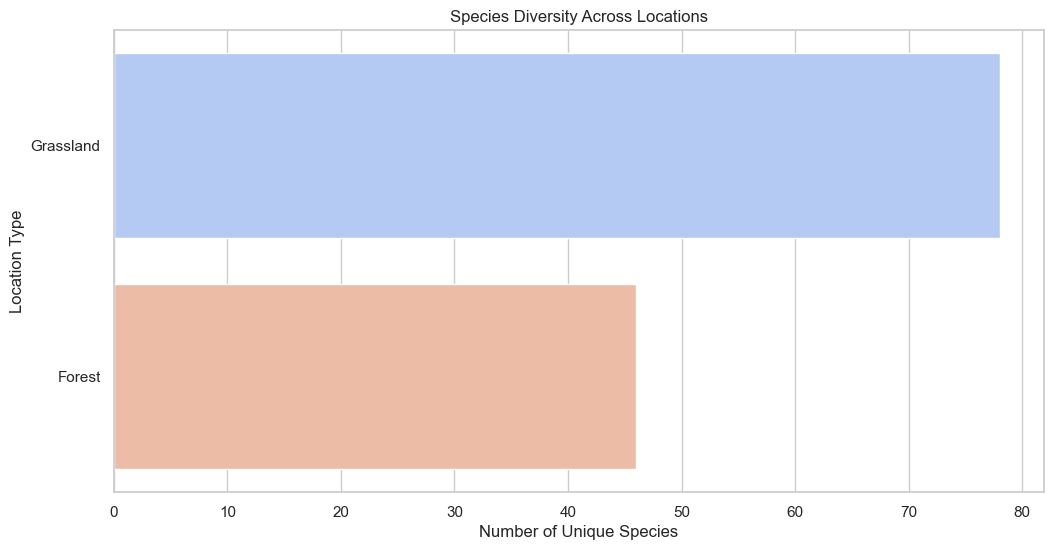

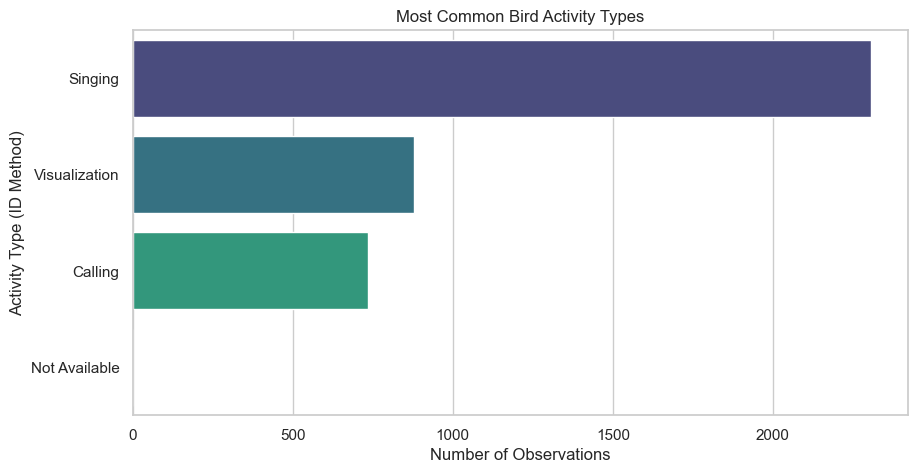

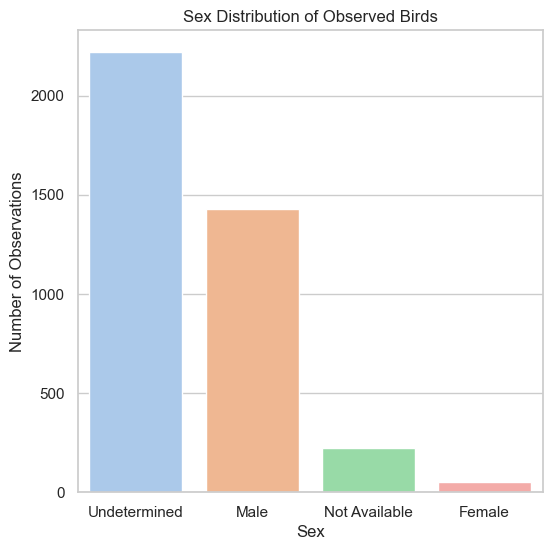

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique species observed
unique_species_count = combined_data["Scientific_Name"].nunique()
print(f"Total Unique Species Observed: {unique_species_count}")

# Count species distribution across different Location_Types
species_distribution = combined_data.groupby("Location_Type")["Scientific_Name"].nunique().reset_index()
species_distribution = species_distribution.sort_values(by="Scientific_Name", ascending=False)

# Visualize species distribution by location
plt.figure(figsize=(12, 6))
sns.barplot(x="Scientific_Name", y="Location_Type", data=species_distribution, hue="Location_Type", dodge=False, legend=False, palette="coolwarm")
plt.title("Species Diversity Across Locations")
plt.xlabel("Number of Unique Species")
plt.ylabel("Location Type")
plt.show()

# Activity Patterns: Check most common activity types
activity_counts = combined_data["ID_Method"].value_counts().reset_index()
activity_counts.columns = ["ID_Method", "Count"]

# Visualize activity patterns
plt.figure(figsize=(10, 5))
sns.barplot(x="Count", y="ID_Method", data=activity_counts,hue="ID_Method",legend= False, palette="viridis")
plt.title("Most Common Bird Activity Types")
plt.xlabel("Number of Observations")
plt.ylabel("Activity Type (ID Method)")
plt.show()

# Analyze Sex Ratio
sex_ratio = combined_data["Sex"].value_counts().reset_index()
sex_ratio.columns = ["Sex", "Count"]

# Visualize sex distribution
plt.figure(figsize=(6, 6))
sns.barplot(x="Sex", y="Count", data=sex_ratio,hue="Sex",legend= False, palette="pastel")
plt.title("Sex Distribution of Observed Birds")
plt.xlabel("Sex")
plt.ylabel("Number of Observations")
plt.show()



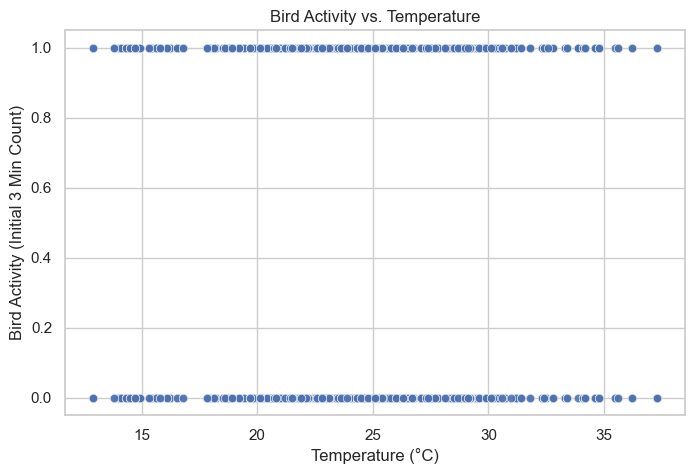

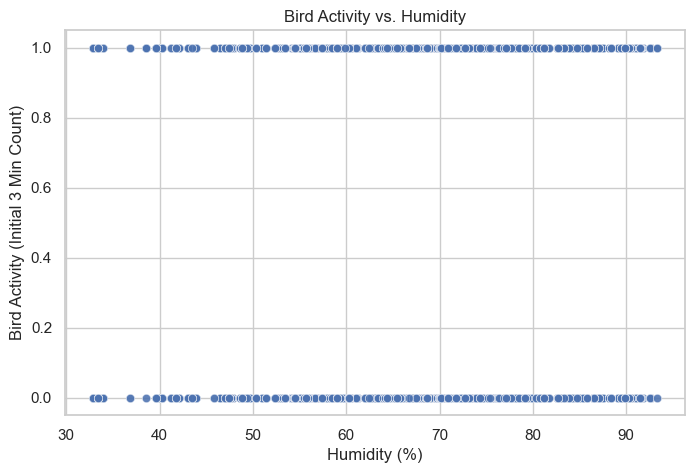

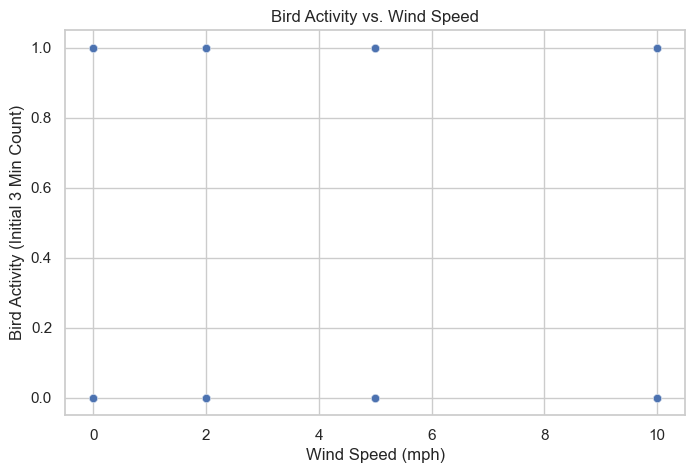

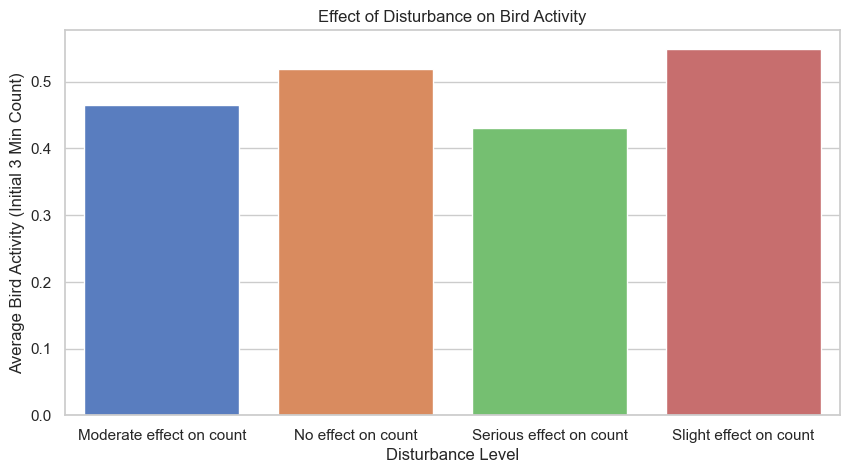

In [10]:
#Environmental Conditions
# Convert relevant columns to numeric
combined_data["Initial_Three_Min_Cnt"] = pd.to_numeric(combined_data["Initial_Three_Min_Cnt"], errors="coerce")
combined_data["Temperature"] = pd.to_numeric(combined_data["Temperature"], errors="coerce")
combined_data["Humidity"] = pd.to_numeric(combined_data["Humidity"], errors="coerce")

# Manual Mapping of Wind Descriptions to Numeric Values
wind_mapping = {
    "Calm (< 1 mph) smoke rises vertically": 0,
    "Light air movement (1-3 mph) smoke drifts": 2,
    "Light breeze (4-7 mph) wind felt on face": 5,
    "Gentle breeze (8-12 mph), leaves in motion": 10,
}

# Replace text descriptions with corresponding numeric values
combined_data["Wind_Speed"] = combined_data["Wind"].map(wind_mapping)

# Drop rows with missing weather data
df_weather = combined_data[["Temperature", "Humidity", "Wind_Speed", "Initial_Three_Min_Cnt"]].dropna()


# Scatter Plot: Temperature vs. Bird Activity**
plt.figure(figsize=(8, 5))
sns.scatterplot(x=combined_data["Temperature"], y=combined_data["Initial_Three_Min_Cnt"], alpha=0.5)
plt.title("Bird Activity vs. Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Bird Activity (Initial 3 Min Count)")
plt.show()

# Scatter Plot: Humidity vs. Bird Activity**
plt.figure(figsize=(8, 5))
sns.scatterplot(x=combined_data["Humidity"], y=combined_data["Initial_Three_Min_Cnt"], alpha=0.5)
plt.title("Bird Activity vs. Humidity")
plt.xlabel("Humidity (%)")
plt.ylabel("Bird Activity (Initial 3 Min Count)")
plt.show()

# Scatter Plot: Wind Speed vs. Bird Activity**
plt.figure(figsize=(8, 5))
sns.scatterplot(x=combined_data["Wind_Speed"], y=combined_data["Initial_Three_Min_Cnt"], alpha=0.5)
plt.title("Bird Activity vs. Wind Speed")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Bird Activity (Initial 3 Min Count)")
plt.show()

# Disturbance Effect Analysis**
combined_data["Disturbance"] = combined_data["Disturbance"].astype(str)  # Ensure it's a string
disturbance_effect = combined_data.groupby("Disturbance")["Initial_Three_Min_Cnt"].mean().reset_index()

# Bar Plot: Effect of Disturbance on Bird Activity**
plt.figure(figsize=(10, 5))
sns.barplot(x="Disturbance", y="Initial_Three_Min_Cnt", data=disturbance_effect,hue="Disturbance",legend= False, palette="muted")
plt.title("Effect of Disturbance on Bird Activity")
plt.xlabel("Disturbance Level")
plt.ylabel("Average Bird Activity (Initial 3 Min Count)")
plt.show()

<Figure size 1800x900 with 0 Axes>

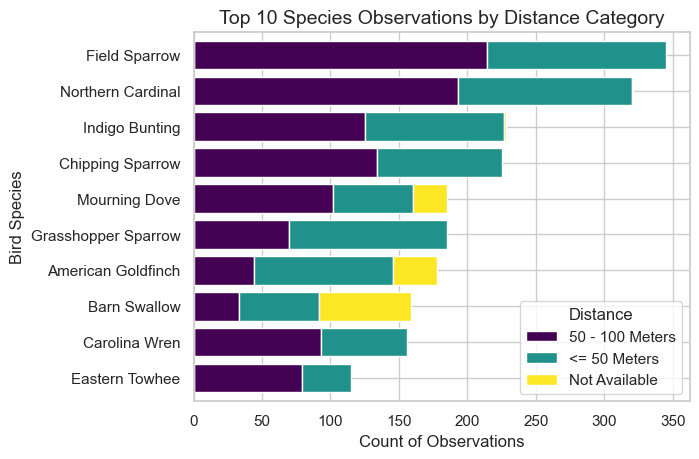

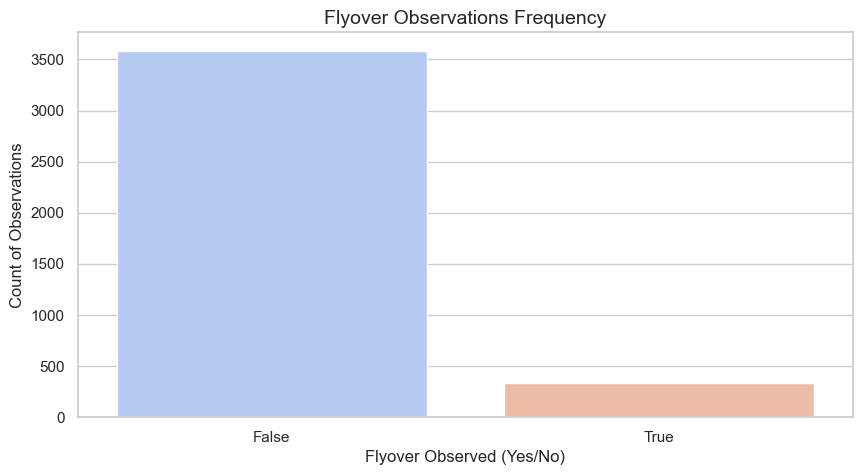

In [11]:
#  Distance and Behavior
# --- Species-wise Distance Analysis ---
# Count of species observed at each distance category
species_distance = combined_data.groupby(["Common_Name", "Distance"]).size().unstack()

# Replace NaN with 0 and sort species by total observations
species_distance = species_distance.fillna(0)
species_distance = species_distance.loc[species_distance.sum(axis=1).sort_values(ascending=False).index]

# Select the top 10 most observed species
top_10_species = species_distance.head(10)

# Plot the top 10 species distribution by distance
plt.figure(figsize=(18, 9))
top_10_species.plot(kind="barh", stacked=True, colormap="viridis", width=0.8)

plt.title("Top 10 Species Observations by Distance Category", fontsize=14)
plt.xlabel("Count of Observations", fontsize=12)
plt.ylabel("Bird Species", fontsize=12)
plt.legend(title="Distance", loc="lower right")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

plt.show()

# --- Flyover Frequency Analysis ---
plt.figure(figsize=(10, 5))
sns.countplot(data=combined_data, x="Flyover_Observed", hue="Flyover_Observed",legend=False, palette="coolwarm")
plt.title("Flyover Observations Frequency", fontsize=14)
plt.xlabel("Flyover Observed (Yes/No)", fontsize=12)
plt.ylabel("Count of Observations", fontsize=12)
plt.show()

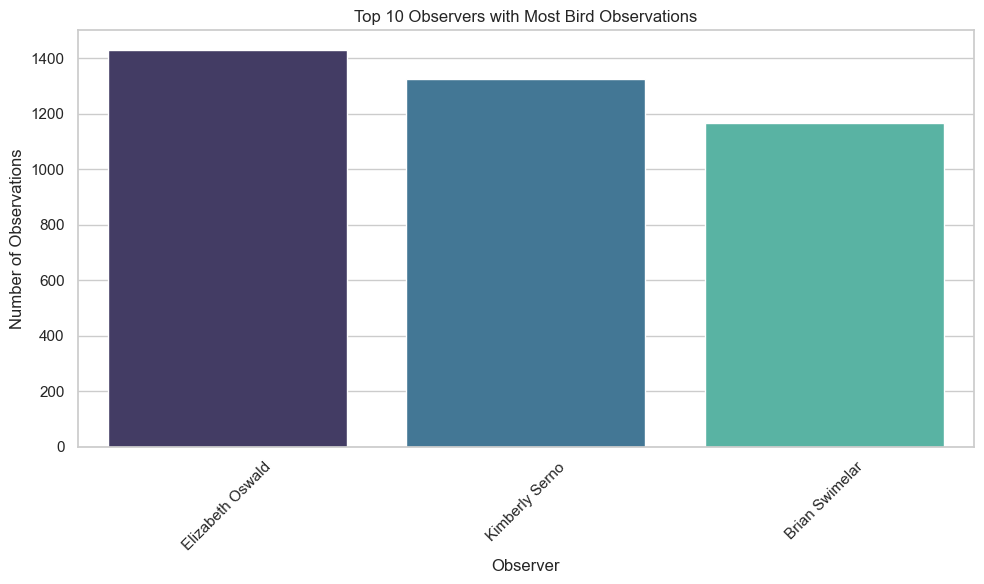

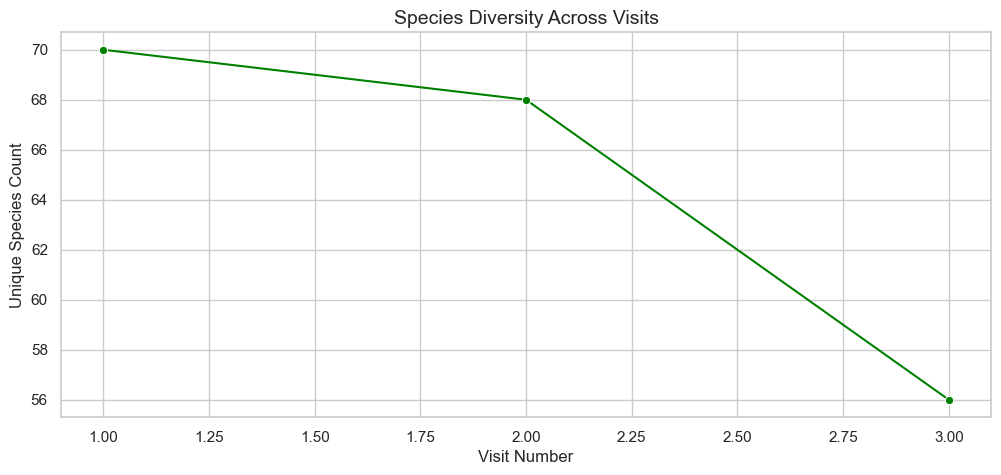

In [12]:
    # Observer Trends
    # Observer Bias
    # Observation frequency by Observer
    observer_counts = combined_data['Observer'].value_counts()

    # Plot observer activity (vertical bar plot)
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=observer_counts.index[:10],  # Top 10 observers
        y=observer_counts.values[:10], 
        palette='mako', 
        hue=observer_counts.index[:10],  # Assign x variable to hue
        dodge=False  # Avoid bar separation
    )
    plt.title('Top 10 Observers with Most Bird Observations')
    plt.xlabel('Observer')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend([], [], frameon=False)  # Remove redundant legend
    plt.tight_layout()
    plt.show()

    # --- Visit Patterns Analysis ---
    # Count unique species observed per visit
    visit_species_counts = combined_data.groupby("Visit")["Common_Name"].nunique()

    # Plot visit vs species count
    plt.figure(figsize=(12, 5))
    sns.lineplot(x=visit_species_counts.index, y=visit_species_counts.values, marker="o", color="green")
    plt.title("Species Diversity Across Visits", fontsize=14)
    plt.xlabel("Visit Number", fontsize=12)
    plt.ylabel("Unique Species Count", fontsize=12)
    plt.grid(True)
    plt.show()

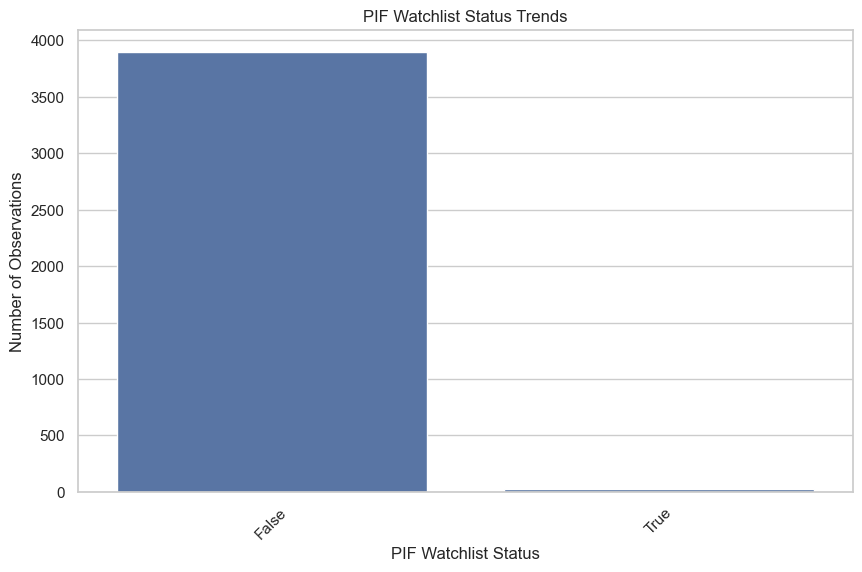

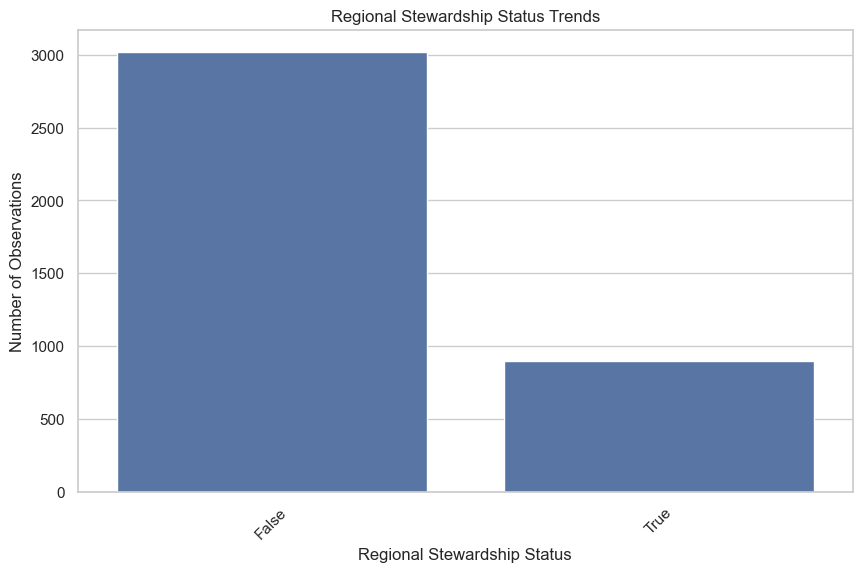

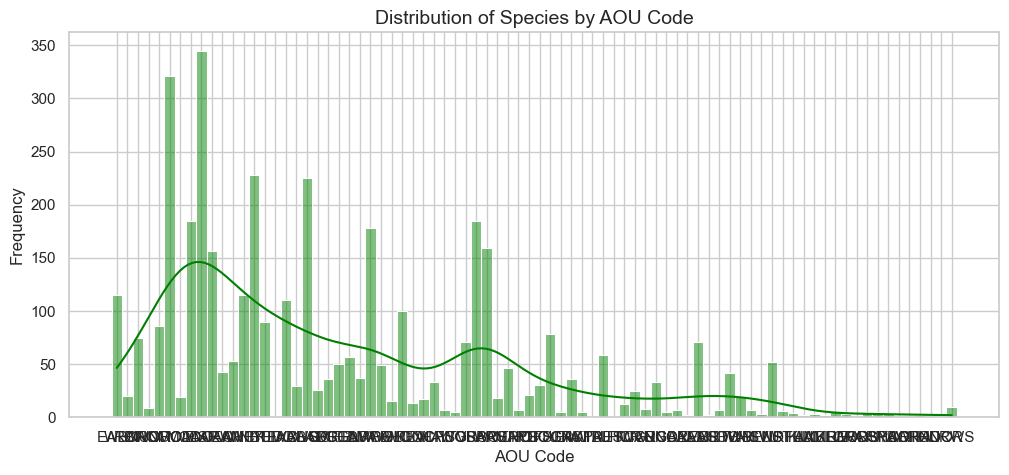

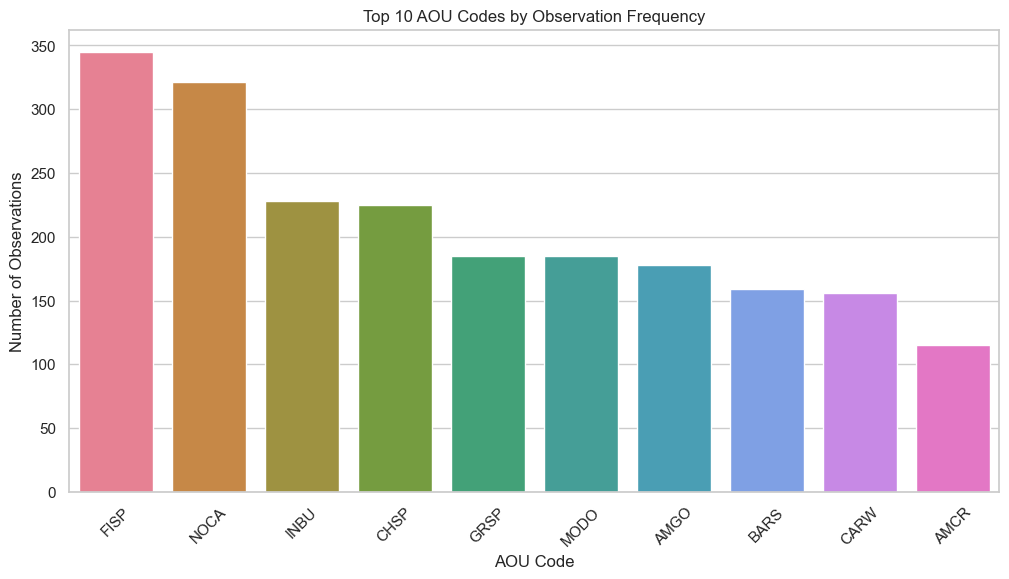

In [ ]:
    # Conservation Insights
    # Watchlist Trends
    watchlist_trends = combined_data['PIF_Watchlist_Status'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=watchlist_trends.index, y=watchlist_trends.values, errorbar=None)
    plt.title('PIF Watchlist Status Trends')
    plt.xlabel('PIF Watchlist Status')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=45)
    plt.show()


    # Stewardship Trends
    stewardship_trends = combined_data['Regional_Stewardship_Status'].value_counts()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=stewardship_trends.index, y=stewardship_trends.values, errorbar=None)
    plt.title('Regional Stewardship Status Trends')
    plt.xlabel('Regional Stewardship Status')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=45)
    plt.show()

    # --- AOU Code Patterns Analysis ---
    # Histogram of AOU Codes
    plt.figure(figsize=(12, 5))
    sns.histplot(combined_data["AOU_Code"].dropna(), bins=30, kde=True, color="green")
    plt.title("Distribution of Species by AOU Code", fontsize=14)
    plt.xlabel("AOU Code", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True)
    plt.show()

    # Display Top 10 AOU Code Patterns
    aou_code_distribution = combined_data['AOU_Code'].value_counts()

    # Create a barplot with multiple colors and updated hue logic
    plt.figure(figsize=(12, 6))
    sns.barplot(x=aou_code_distribution.index[:10],y=aou_code_distribution.values[:10],hue=aou_code_distribution.index[:10],  # Use `x` as `hue` for distinct colorsdodge=False,  # Ensure one bar per category
            palette=sns.color_palette("husl", 10),  # Colorful palette
            errorbar=None,
            legend=False  # Disable legend
        )
    plt.title('Top 10 AOU Codes by Observation Frequency')
    plt.xlabel('AOU Code')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation=45)
    plt.show()